In [1]:
pwd

'/home/wsuser/work'

In [2]:
!pip install keras
!pip install tensorflow
!pip install numpy
!pip install scikit-image
!pip install imutils
!pip install scikit-learn
!pip install opencv-contrib-python
!pip install Flask

# Data Collection
> ## Download the Dataset

# Image Pre-Processing

> ## Importing the Necessary Libraries

In [3]:
!pip install opencv-python

In [4]:
!pip install opencv-python-headless

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile as zf
import os
import random
import pickle
import cv2
from imutils import build_montages
from imutils import paths
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder,LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from skimage import feature
#from google.colab.patches import cv2_imshow

In [6]:
sns.set()
os.getcwd()

'/home/wsuser/work'

> ## Loading the training and testing dataset

In [7]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='EF2lceL2bLbK4E06iMgsWfS1Mg8GbSMS1BjFOAj5unjR',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'detectingparkinsonsdiseaseusingma-donotdelete-pr-vl0bddwsipvt9p'
object_key = 'dataset1.zip'

streaming_body_4 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [8]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_4.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [9]:
pwd

'/home/wsuser/work'

In [10]:
import os
filenames=os.listdir('/home/wsuser/work/dataset')

In [11]:
spiral_train_healthy = os.listdir('/home/wsuser/work/dataset/spiral/training/healthy/')
spiral_train_park = os.listdir('/home/wsuser/work/dataset/spiral/training/parkinson/')

fp_spiral_train_healthy = '/home/wsuser/work/dataset/spiral/training/healthy/'
fp_spiral_train_park = '/home/wsuser/work/dataset/spiral/training/parkinson/'

spiral_test_healthy = os.listdir('/home/wsuser/work/dataset/spiral/testing/healthy/')
spiral_test_park = os.listdir('/home/wsuser/work/dataset/spiral/testing/parkinson/')

fp_spiral_test_healthy = '/home/wsuser/work/dataset/spiral/testing/healthy/'
fp_spiral_test_park = '/home/wsuser/work/dataset/spiral/testing/parkinson/'

In [12]:
wave_train_healthy = os.listdir('/home/wsuser/work/dataset/wave/training/healthy/')
wave_train_park = os.listdir('/home/wsuser/work/dataset/wave/training/parkinson/')

fp_wave_train_healthy = '/home/wsuser/work/dataset/wave/training/healthy/'
fp_wave_train_park = '/home/wsuser/work/dataset/wave/training/parkinson/'

wave_test_healthy = os.listdir('/home/wsuser/work/dataset/wave/testing/healthy/')
wave_test_park = os.listdir('/home/wsuser/work/dataset/wave/testing/parkinson/')

fp_wave_test_healthy = '/home/wsuser/work/dataset/wave/testing/healthy/'
fp_wave_test_park = '/home/wsuser/work/dataset/wave/testing/parkinson/'


> ## Quantifying Images

In [13]:
def quantify_image(image):
  features = feature.hog(image,orientations=9,
                pixels_per_cell=(10,10),cells_per_block=(2,2),transform_sqrt=True,block_norm="L1")

  return features

In [14]:
def quantify_image(image_wave):
  features_wave = feature.hog(image_wave,orientations=9,
                pixels_per_cell=(10,10),cells_per_block=(2,2),transform_sqrt=True,block_norm="L1")

  return features_wave

> ## Splitting up of training and testing data

In [15]:
trainX = []
testX = []
outputs = []
trainY = []
testY = []

for i in spiral_train_healthy:
  image = cv2.imread(fp_spiral_train_healthy+i)
  image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image , (200,200))
  image =cv2.threshold(image, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  features = quantify_image(image)
  trainX.append(features)
  trainY.append('healthy')

for i in spiral_train_park:
  image = cv2.imread(fp_spiral_train_park+i)
  image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image , (200,200))
  image = cv2.threshold(image ,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  features = quantify_image(image)
  trainX.append(features)
  trainY.append('parkinson')



for i in spiral_test_healthy:
  image = cv2.imread(fp_spiral_test_healthy+i)
  outputs.append(image)
  image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image , (200,200))
  image = cv2.threshold(image ,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  features = quantify_image(image)
  testX.append(features)
  testY.append('healthy')

for i in spiral_test_park:
  image = cv2.imread(fp_spiral_test_park+i)
  outputs.append(image)
  image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image , (200,200))
  image = cv2.threshold(image ,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  features = quantify_image(image)
  testX.append(features)
  testY.append('parkinson')
    

In [16]:
trainX_wave = []
testX_wave = []
outputs_wave = []
trainY_wave = []
testY_wave = []

for i in wave_train_healthy:
  image_wave = cv2.imread(fp_wave_train_healthy+i)
  image_wave = cv2.cvtColor(image_wave , cv2.COLOR_BGR2GRAY)
  image_wave = cv2.resize(image_wave , (200,200))
  image_wave =cv2.threshold(image_wave, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  features_wave = quantify_image(image_wave)
  trainX_wave.append(features_wave)
  trainY_wave.append('healthy')

for i in wave_train_park:
  image_wave = cv2.imread(fp_wave_train_park+i)
  image_wave = cv2.cvtColor(image_wave , cv2.COLOR_BGR2GRAY)
  image_wave = cv2.resize(image_wave , (200,200))
  image_wave = cv2.threshold(image_wave ,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  features_wave = quantify_image(image_wave)
  trainX_wave.append(features_wave)
  trainY_wave.append('parkinson')

for i in wave_test_healthy:
  image_wave = cv2.imread(fp_wave_test_healthy+i)
  outputs_wave.append(image_wave)
  image_wave = cv2.cvtColor(image_wave , cv2.COLOR_BGR2GRAY)
  image_wave = cv2.resize(image_wave , (200,200))
  image_wave = cv2.threshold(image_wave ,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  features_wave = quantify_image(image_wave)
  testX_wave.append(features_wave)
  testY_wave.append('healthy')

for i in wave_test_park:
  image_wave = cv2.imread(fp_wave_test_park+i)
  outputs_wave.append(image_wave)
  image_wave = cv2.cvtColor(image_wave , cv2.COLOR_BGR2GRAY)
  image_wave = cv2.resize(image_wave, (200,200))
  image_wave = cv2.threshold(image_wave ,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  features_wave = quantify_image(image_wave)
  testX_wave.append(features_wave)
  testY_wave.append('parkinson')

In [17]:
trainX = np.array(trainX)
testX = np.array(testX)
trainY = np.array(trainY)
testY = np.array(testY)


In [18]:
trainX

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
trainY

array(['healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson'], dtype='<U9')

In [20]:
testX

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
testY

array(['healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson'], dtype='<U9')

In [22]:
trainX_wave = np.array(trainX_wave)
testX_wave = np.array(testX_wave)
trainY_wave = np.array(trainY_wave)
testY_wave = np.array(testY_wave)

In [23]:
trainX_wave

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.06109876, 0.        , 0.20984484, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.24999804, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [24]:
testX_wave

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
trainY_wave

array(['healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson'], dtype='<U9')

In [26]:
testY_wave

array(['healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson'], dtype='<U9')

> ## Label Encoding



In [27]:
le = LabelEncoder()
trainY = le.fit_transform(trainY)
testY = le.transform(testY)
print(trainX.shape,trainY.shape)

(72, 12996) (72,)


In [28]:
trainY

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [29]:
testY

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [30]:
le = LabelEncoder()
trainY_wave = le.fit_transform(trainY_wave)
testY_wave = le.transform(testY_wave)
print(trainX_wave.shape,trainY_wave.shape)

(72, 12996) (72,)


In [31]:
trainY_wave

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [32]:
testY_wave

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

# Model Building

> ## Training the model

In [33]:
print("Training model....for Spiral Data")
model = RandomForestClassifier(n_estimators=100)
model.fit(trainX,trainY)

Training model....for Spiral Data


RandomForestClassifier()

In [34]:
print("Training model....for Wave Data")
model_wave = RandomForestClassifier(n_estimators=100)
model_wave.fit(trainX_wave,trainY_wave)

Training model....for Wave Data


RandomForestClassifier()

In [35]:
preds = model.predict(testX)
preds

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1])

In [36]:
preds_wave = model_wave.predict(testX_wave)
preds_wave

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1])

> ## Model Evaluation

In [37]:
cnf = confusion_matrix(testY,preds)
cnf

array([[14,  1],
       [ 3, 12]])

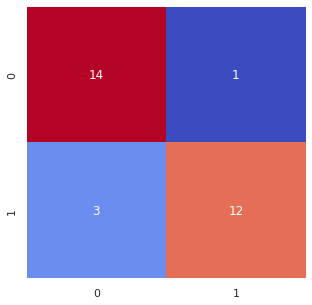

In [38]:
plt.figure(figsize=(5,5))
sns.heatmap(cnf , annot=True , cmap="coolwarm" , cbar=False)
plt.show()

In [39]:
acc = metrics.accuracy_score(testY,preds)
acc

0.8666666666666667

In [40]:
indexes = np.random.randint(0,30,25)
indexes

array([11, 17,  6, 19,  0, 11, 21,  4, 27,  9, 23,  8, 18, 21,  1,  7, 20,
       15, 21, 22, 27, 28, 18,  7,  6])

In [41]:
cnf_wave = confusion_matrix(testY_wave,preds_wave)
cnf_wave

array([[12,  3],
       [ 6,  9]])

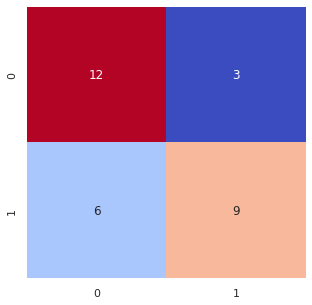

In [42]:
plt.figure(figsize=(5,5))
sns.heatmap(cnf_wave , annot=True , cmap="coolwarm" , cbar=False)
plt.show()

In [43]:
acc_wave = metrics.accuracy_score(testY_wave,preds_wave)
acc_wave

0.7

In [44]:
indexes_wave = np.random.randint(0,30,25)
indexes_wave

array([23, 29,  8, 25,  3, 13,  9, 13, 24,  5, 18, 25,  8,  6, 29, 20, 18,
       10, 24, 22,  9, 27,  9,  4, 11])

> ## Testing the Model

In [45]:
testpath=list(paths.list_images(fp_spiral_train_healthy))
idxs=np.arange(0,len(testpath))
idxs=np.random.choice(idxs,size=(25,),replace=False)
images=[]

for i in idxs:
    image=cv2.imread(testpath[i])
    output=image.copy()
    output=cv2.resize(output,(128,128))
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image=cv2.resize(image,(200,200))
    image=cv2.threshold(image,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    features= quantify_image(image)
    preds=model.predict([features])
    label=le.inverse_transform(preds)[0]
    if label=="healthy":
      color=(0,255,0) 
    else:
      (0,0,255)
    cv2.putText(output,label, (3,20),cv2.FONT_HERSHEY_SIMPLEX,0.5,color,2)
    images.append(output)

In [46]:
'''montage = build_montages(images,(128,128),(5,5))[0]
cv2.imshow(montage)
cv2.waitKey(0)'''

print(images)

[array([[[243, 243, 243],
        [242, 242, 242],
        [240, 240, 240],
        ...,
        [231, 231, 231],
        [233, 233, 233],
        [238, 238, 238]],

       [[244, 244, 244],
        [239, 239, 239],
        [235, 235, 235],
        ...,
        [236, 236, 236],
        [230, 230, 230],
        [228, 228, 228]],

       [[239, 239, 239],
        [246, 246, 246],
        [243, 243, 243],
        ...,
        [240, 240, 240],
        [233, 233, 233],
        [238, 238, 238]],

       ...,

       [[235, 235, 235],
        [236, 236, 236],
        [238, 238, 238],
        ...,
        [244, 244, 244],
        [236, 236, 236],
        [236, 236, 236]],

       [[241, 241, 241],
        [235, 235, 235],
        [237, 237, 237],
        ...,
        [233, 233, 233],
        [236, 236, 236],
        [236, 236, 236]],

       [[241, 241, 241],
        [237, 237, 237],
        [239, 239, 239],
        ...,
        [240, 240, 240],
        [226, 226, 226],
        [233, 233, 233]

In [47]:
testpath_wave=list(paths.list_images(fp_wave_train_healthy))
idxs_wave=np.arange(0,len(testpath_wave))
idxs_wave=np.random.choice(idxs_wave,size=(25,),replace=False)
images_wave=[]

for i in idxs_wave:
    image_wave=cv2.imread(testpath_wave[i])
    output_wave=image_wave.copy()
    output_wave=cv2.resize(output_wave,(128,128))
    image_wave=cv2.cvtColor(image_wave,cv2.COLOR_BGR2GRAY)
    image_wave=cv2.resize(image_wave,(200,200))
    image_wave=cv2.threshold(image_wave,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    features_wave= quantify_image(image_wave)
    preds_wave=model_wave.predict([features_wave])
    label_wave=le.inverse_transform(preds_wave)[0]
    if label_wave=="healthy":
      color=(0,255,0) 
    else:
      (0,0,255)
    cv2.putText(output_wave,label_wave, (3,20),cv2.FONT_HERSHEY_SIMPLEX,0.5,color,2)
    images_wave.append(output_wave)

In [48]:
'''montage_wave=build_montages(images_wave,(128,128),(5,5))[0]
cv2.imshow(montage_wave)
cv2.waitKey(0)'''

print(images_wave)

[array([[[231, 231, 231],
        [230, 230, 230],
        [242, 242, 242],
        ...,
        [228, 228, 228],
        [227, 227, 227],
        [232, 232, 232]],

       [[234, 234, 234],
        [239, 239, 239],
        [228, 228, 228],
        ...,
        [232, 232, 232],
        [229, 229, 229],
        [237, 237, 237]],

       [[241, 241, 241],
        [232, 232, 232],
        [239, 239, 239],
        ...,
        [232, 232, 232],
        [234, 234, 234],
        [238, 238, 238]],

       ...,

       [[235, 235, 235],
        [243, 243, 243],
        [238, 238, 238],
        ...,
        [236, 236, 236],
        [238, 238, 238],
        [235, 235, 235]],

       [[239, 239, 239],
        [246, 246, 246],
        [245, 245, 245],
        ...,
        [238, 238, 238],
        [236, 236, 236],
        [223, 223, 223]],

       [[236, 236, 236],
        [242, 242, 242],
        [236, 236, 236],
        ...,
        [231, 231, 231],
        [229, 229, 229],
        [229, 229, 229]

> ## Predicting the model-Accuracy and Confusion Matrix

In [49]:
predictions = model.predict(testX)

cm = confusion_matrix(testY, predictions).flatten()
print(cm)
(tn, fp, fn, tp) = cm
accuracy = (tp + tn) / float(cm.sum())
print(accuracy)


[14  1  3 12]
0.8666666666666667


In [50]:
predictions_wave = model_wave.predict(testX_wave)

cm_wave = confusion_matrix(testY_wave, predictions_wave).flatten()
print(cm_wave)
(tn_w, fp_w, fn_w, tp_w) = cm_wave
accuracy_wave = (tp_w + tn_w) / float(cm_wave.sum())
print(accuracy)

[12  3  6  9]
0.8666666666666667


> ## Save the Model

In [51]:
pickle.dump(model,open('parkinson.pkl','wb')) 

In [52]:
!tar -zcvf parkinson-model-detection.tgz parkinson.pkl

parkinson.pkl


In [53]:
ls -l

total 248
drwxrwx--- 4 wsuser wscommon   4096 Nov 19 19:10 dataset/
-rw-rw---- 1 wsuser wscommon  23316 Nov 19 20:11 Deployed_Model.tar.gz
-rw-rw---- 1 wsuser wscommon  23069 Nov 19 20:34 DeployedModel.tar.gz
-rw-rw---- 1 wsuser wscommon  23050 Nov 19 20:41 Parkinson_Deployed_Model.tar.gz
-rw-rw---- 1 wsuser wscommon  23222 Nov 19 21:08 parkinson-model-detection.tgz
-rw-rw---- 1 wsuser wscommon 149041 Nov 19 21:08 parkinson.pkl


In [54]:
!pip install watson-machine-learning-client --upgrade

In [55]:
from ibm_watson_machine_learning import APIClient
import json
import numpy as np

wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"ivj4jzSXTsOMLEPAunA74q2PkIkMvYlEHBq8iiD-fWes"
}
client=APIClient(wml_credentials)

In [56]:
client=APIClient(wml_credentials)
client

In [57]:
client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -------------------------------------------------------------  ------------------------
ID                                    NAME                                                           CREATED
6144a3e8-54bc-4e3d-85fa-02ed2ff80acb  Detecting Parkinson Disease Using Machine Learning-Deployment  2022-11-19T19:39:03.846Z
------------------------------------  -------------------------------------------------------------  ------------------------


In [58]:
def guid_from_space_name(client,space_name):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']["name"]==space_name)['metadata']['id'])

In [59]:
space_uid=guid_from_space_name(client,'Detecting Parkinson Disease Using Machine Learning-Deployment')
print("SPACE UID "+space_uid)

SPACE UID 6144a3e8-54bc-4e3d-85fa-02ed2ff80acb


In [60]:
client.set.default_space(space_uid)

'SUCCESS'

In [61]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [62]:
import sklearn
sklearn.__version__

'1.0.2'

In [63]:
software_spec_uid=client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [64]:
model_details=client.repository.store_model(model='parkinson-model-detection.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"Detecting Parkinson's Disease Using Machine Learning",
    client.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid,
})

model_id=client.repository.get_model_id(model_details)

In [65]:
model_id

'9879f380-54ca-4a64-921a-f5ffe4a46827'

In [66]:
client.repository.download(model_id,'Deployed_Parkinson_Detection_Model.tar.gz')


Successfully saved model content to file: 'Deployed_Parkinson_Detection_Model.tar.gz'


'/home/wsuser/work/Deployed_Parkinson_Detection_Model.tar.gz'

In [67]:
#Deployment in props

deployment_props = {
    client.deployments.ConfigurationMetaNames.NAME : 'Detecting Parkinson Disease Using Machine Learning-Deployment',
    client.deployments.ConfigurationMetaNames.ONLINE : {}
}


In [68]:
deployment = client.deployments.create(
    artifact_uid = model_id,
    meta_props = deployment_props
)



#######################################################################################

Synchronous deployment creation for uid: '9879f380-54ca-4a64-921a-f5ffe4a46827' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='50e1e6fc-d798-4ee9-a28c-5f85dfbba33a'
------------------------------------------------------------------------------------------------




In [69]:
loaded_model = pickle.load(open('parkinson.pkl', 'rb'))
result = loaded_model.score(testX, testY)
print(result)

0.8666666666666667


In [70]:
model.predict(testX)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1])

In [71]:
model_wave.predict(testX_wave)

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1])